In [1]:
import pandas as pd 
import numpy as np
data = pd.read_pickle('Filling_nans')
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [2]:
pos_score = []
neg_score = []
pos_file = open('./data/pos_score.txt', 'r')
neg_file = open('./data/neg_score.txt', 'r')
for line in pos_file.readlines():
    pos_score.append(float(line))
for line in neg_file.readlines():
    neg_score.append(float(line))

In [3]:
new = pd.DataFrame({'Hotel_name': data['Hotel_Name'], 'Reviewer_score': data['Reviewer_Score'], 'Neg_review': data['Negative_Review'], 
                   'Pos-reivew': data['Positive_Review'], 'Avg_score': data['Average_Score'], 'pos_score': pos_score, 
                   'neg_score': neg_score})

In [4]:
new.head()

,Avg_score,Hotel_name,Neg_review,Pos-reivew,Reviewer_score,neg_score,pos_score
0,7.7,Hotel Arena,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,465.1,23.1
1,7.7,Hotel Arena,No Negative,No real complaints the hotel was great great ...,7.5,0.0,135.7
2,7.7,Hotel Arena,Rooms are nice but for elderly a bit difficul...,Location was good and staff were ok It is cut...,7.1,63.2,57.3
3,7.7,Hotel Arena,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,3.8,466.0,63.6
4,7.7,Hotel Arena,You When I booked with your company on line y...,Amazing location and building Romantic setting,6.7,141.8,43.6


In [5]:
new['Reviewer_score'].value_counts()

10.0    115758
9.6      71110
9.2      58526
8.8      46386
8.3      41090
7.5      34831
7.9      33062
7.1      24837
6.7      18765
6.3      14909
5.8      12014
5.4       9518
5.0       8408
4.6       6226
4.2       5089
3.8       4035
3.3       2765
2.5       2192
2.9       1583
9.5        724
9.0        646
8.5        508
8.0        505
7.0        410
6.5        345
6.0        253
5.5        227
4.5        122
4.0         84
3.5         79
9.4         63
8.1         39
3.0         37
6.9         29
5.6         17
4.4         12
3.1          8
Name: Reviewer_score, dtype: int64

In [6]:
from sklearn import linear_model
from sklearn import metrics

In [7]:
X = new[['pos_score', 'neg_score']]
y = new['Reviewer_score']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
print(regressor.coef_, regressor.intercept_)

(array([ 0.01183668, -0.01697772]), 8.24393084976765)


In [10]:
y_pred = regressor.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison[:5]

,Actual,Predicted
499860,8.3,8.653194
453739,7.9,8.443674
484096,9.6,8.172326
415438,10.0,9.280633
248620,4.6,6.317105


In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

('Mean Absolute Error:', 1.0824430198662658)
('Mean Squared Error:', 1.9188871956284612)
('Root Mean Squared Error:', 1.3852390391656095)


In [12]:
review_score_model = [regressor.coef_[0], regressor.coef_[1], regressor.intercept_]
review_score_model

[0.011836679330565333, -0.016977716121541978, 8.24393084976765]

In [13]:
model_para = pd.DataFrame({'para': review_score_model})
model_para.to_pickle('./data/reviewer_score_model_para')

In [14]:
model_para

,para
0,0.011837
1,-0.016978
2,8.243931


Text(0,0.5,'Count')

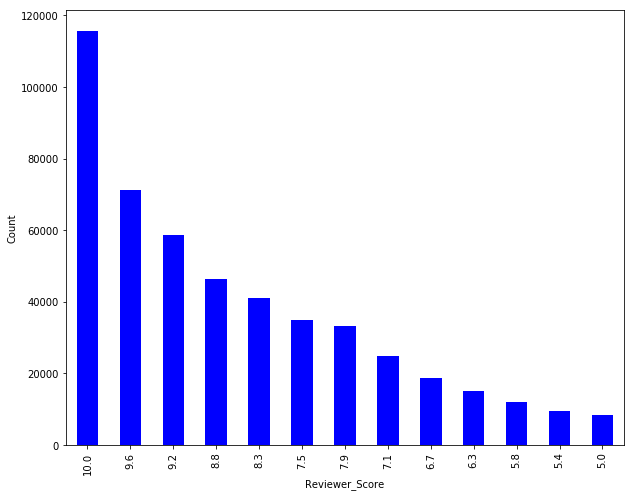

In [15]:
import matplotlib.pylab as plt
plt.figure()
%matplotlib inline
reviewer_score_count = new['Reviewer_score'].value_counts()
###plot top 10 reviewed hotel names
reviewer_score_count[: 5].plot(kind = "bar", color = 'blue', figsize = (10, 8))
plt.xlabel('Reviewer_Score')
plt.ylabel('Count')